# Problem Statement
This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [12,8]

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((35000, 20), (15000, 19))

In [4]:
combined = pd.concat([train, test], ignore_index= True)

In [5]:
combined.shape

(50000, 20)

In [6]:
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [7]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [8]:
print(combined.rate_code.unique())
print(combined.payment_type.unique())
print(combined.imp_surcharge.unique())
print(combined.mta_tax.unique())


[1 3 5 4 2]
[1 2 3 4]
[0.3 0. ]
[0.5 0. ]


In [9]:
# Conversion of the above variables into object
combined['imp_surcharge'] = combined['imp_surcharge'].astype('object')
combined['rate_code'] = combined['rate_code'].astype('object')
combined['payment_type'] = combined['payment_type'].astype('object')
combined['mta_tax'] = combined['mta_tax'].astype('object')

In [10]:
combined.dtypes

trip_distance              float64
rate_code                   object
store_and_fwd_flag          object
payment_type                object
fare_amount                float64
extra                      float64
mta_tax                     object
tip_amount                 float64
tolls_amount               float64
imp_surcharge               object
total_amount               float64
pickup_location_id           int64
dropoff_location_id          int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
hour_of_day                  int64
trip_duration              float64
calculated_total_amount    float64
dtype: object

In [11]:
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

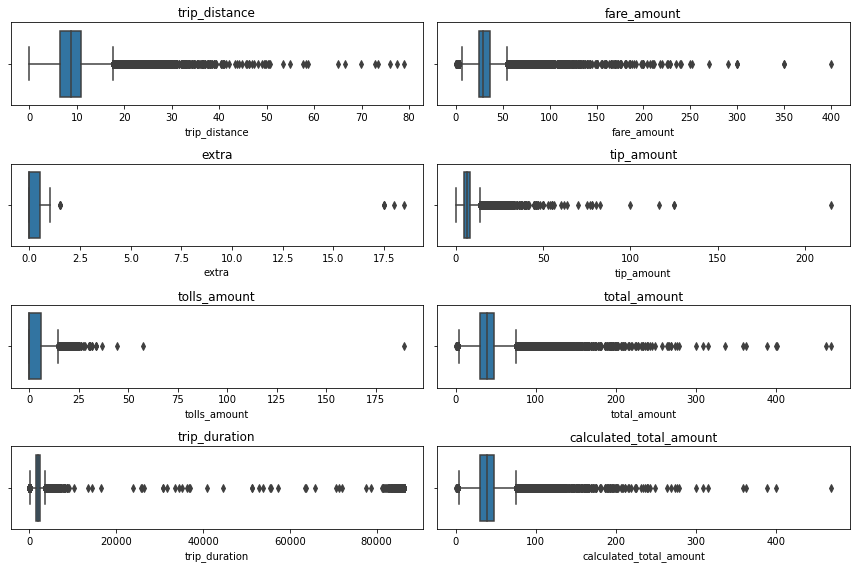

In [19]:
# Checking for outliers

num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

nrows = 4
ncols = 2
repeater = 1

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(combined[i].dropna())
    plt.title(i)
    repeater+=1
plt.tight_layout()
plt.show()

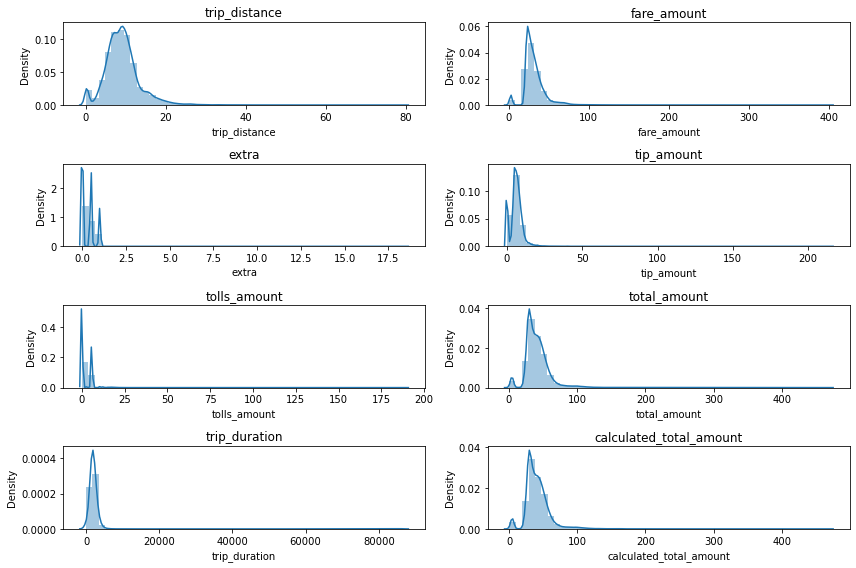

In [15]:
# Univariate Analysis
num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

nrows = 4
ncols = 2
repeater = 1

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined[i].dropna())
    plt.title(i)
    repeater+=1
plt.tight_layout()
plt.show()

# All numerical variables are +vely skewed

In [16]:
# Categorical variable

combined.select_dtypes(exclude = np.number).columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

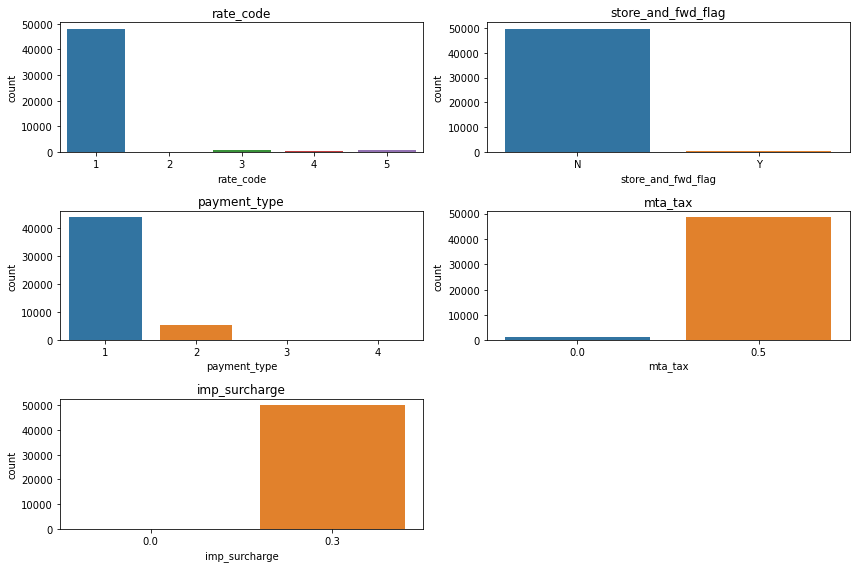

In [17]:
cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

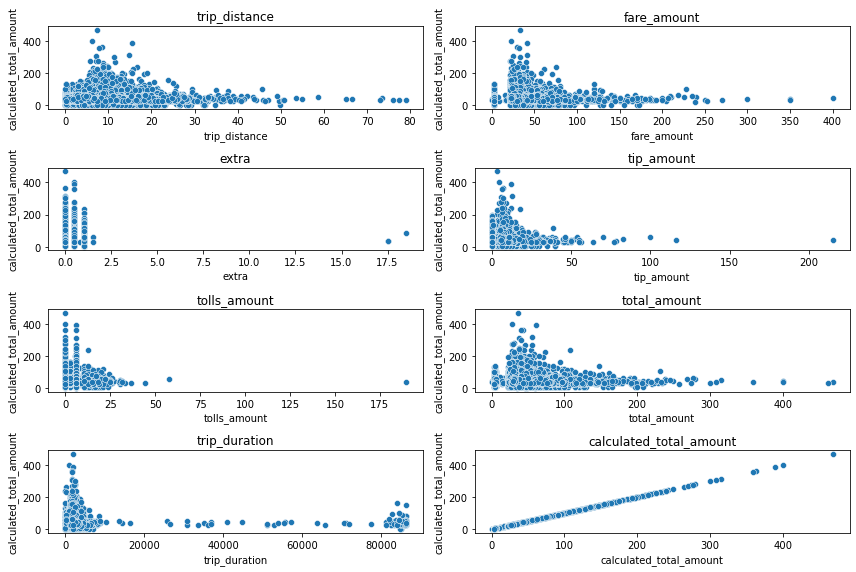

In [20]:
# Bivariate Analysis

# Num vs Num

num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration',
       'calculated_total_amount']

nrows = 4

ncols = 2
repeater = 1

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.scatterplot(combined[i].dropna(),combined.calculated_total_amount)
    plt.title(i)
    repeater+=1
plt.tight_layout()
plt.show()


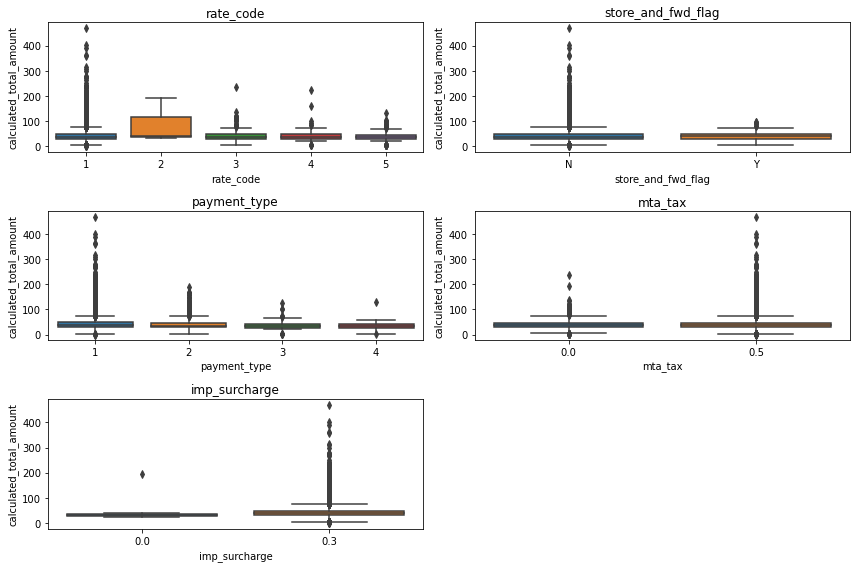

In [21]:
# Bivariate Analysis

# Cat vs Num

cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined[i],combined.calculated_total_amount)
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

In [22]:
# Missing values

combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

<AxesSubplot:>

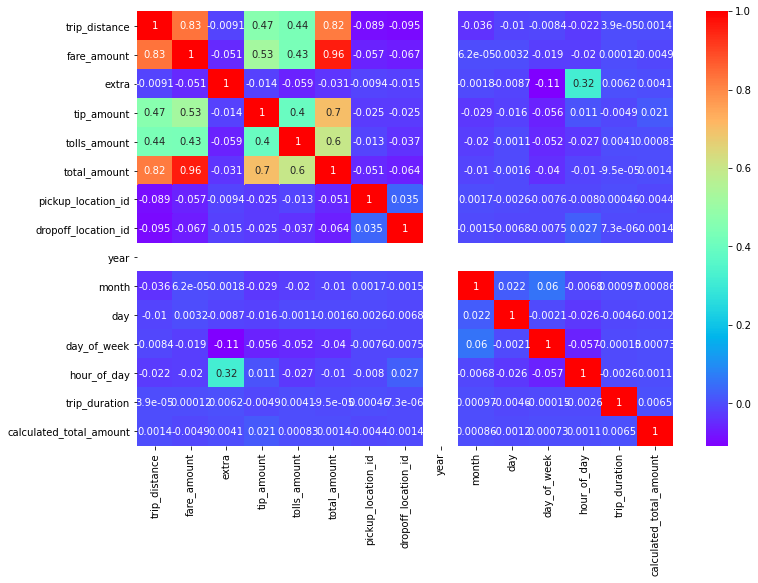

In [28]:
# Bivariate 

sns.heatmap(combined.corr(),annot=True,cmap='rainbow')

#year has a blank line because only one category present

# Feature Engineering

In [29]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

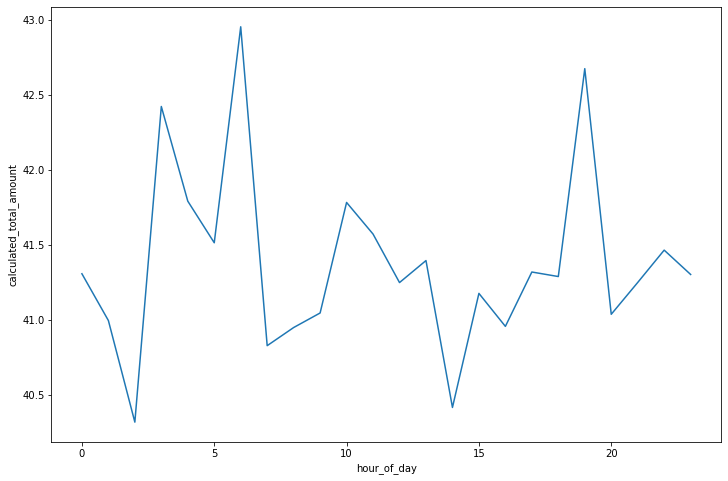

In [40]:
sns.lineplot(combined['hour_of_day'],combined['calculated_total_amount'])
plt.show()

In [42]:
# Rush hour

combined['Rush_hour']=combined.hour_of_day.apply(lambda x: 1 if x in[6,10,15,16,17,18,19,20] else 0)

In [43]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0


<AxesSubplot:xlabel='Rush_hour', ylabel='calculated_total_amount'>

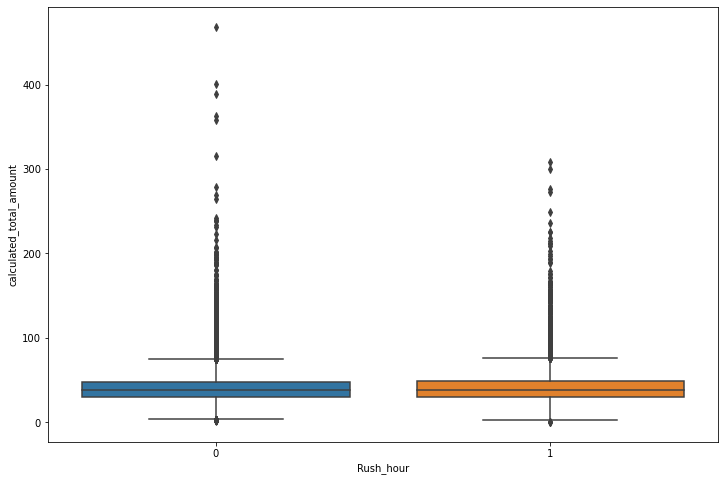

In [44]:
#Rush_hour and Target

sns.boxplot(x = 'Rush_hour', y = 'calculated_total_amount', data = combined)

<AxesSubplot:xlabel='month', ylabel='calculated_total_amount'>

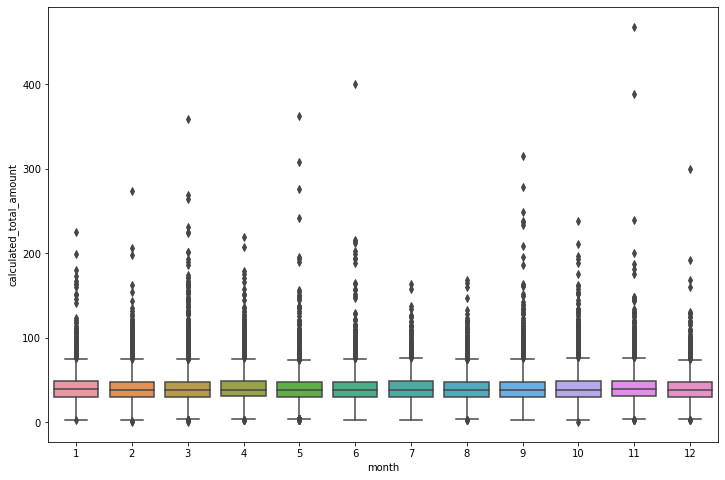

In [48]:
sns.boxplot(combined['month'],combined['calculated_total_amount'])

# Clustering

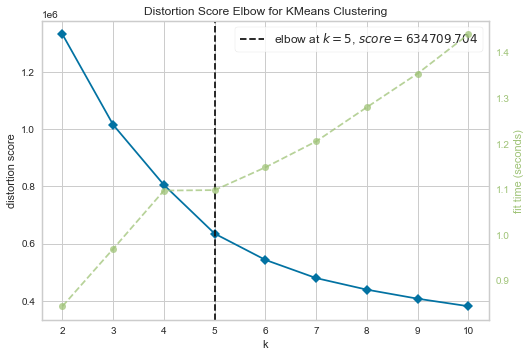

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(estimator = kmeans, 
                              random_state = 0)

data = combined.loc[:, ['day_of_week','hour_of_day','month']]

visualizer.fit(data)
visualizer.show()

In [51]:
# n_clusters = 5
data = combined.loc[:, ['day_of_week','hour_of_day','month']]

kmeans = KMeans(n_clusters=5, random_state=0)

k = kmeans.fit(data)

combined['clusters'] = k.labels_

In [52]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3


In [53]:
# Split the data into train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

In [54]:
newtrain.shape, newtest.shape

((35000, 22), (15000, 22))

In [56]:
newtest = newtest.drop('calculated_total_amount',axis=1)

In [57]:
newtrain.shape, newtest.shape

((35000, 22), (15000, 21))

In [58]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3


# Outlier Removal

In [60]:
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr = q3-q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

wt_outliers = newtrain.loc[~((newtrain<lower_limit)|(newtrain>upper_limit)).any(axis=1)]

In [61]:
wt_outliers.shape

(26105, 22)

In [63]:
# dropping insignificant columns 

finaltrain = wt_outliers.drop(['calculated_total_amount','year','pickup_location_id','dropoff_location_id'],axis=1)

finaltest = newtest.drop(['year','pickup_location_id','dropoff_location_id'],axis=1)

In [64]:
finaltrain.shape, finaltest.shape

((26105, 18), (15000, 18))

In [65]:
finaltrain.select_dtypes(include = np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'Rush_hour', 'clusters'],
      dtype='object')

In [68]:
num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration']

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

for i in num_cols:
    finaltrain.loc[:, i]=minmax.fit_transform(pd.DataFrame(finaltrain.loc[:, i]))
    finaltest.loc[:, i]=minmax.transform(pd.DataFrame(finaltest.loc[:, i]))

In [69]:
finaltrain.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,Rush_hour,clusters
0,0.506764,1,N,1,0.408034,0.0,0.5,0.602071,0.403927,0.3,0.482450,0.181818,0.200000,0.333333,0.260870,0.566583,1,4
2,0.542841,1,N,1,0.735729,0.0,0.5,0.710799,0.403927,0.3,0.735922,0.000000,0.933333,0.000000,0.347826,0.329689,0,4
3,0.534386,1,N,1,0.492600,0.5,0.5,0.684172,0.403927,0.3,0.566243,0.727273,0.800000,0.166667,0.869565,0.694141,1,3
4,0.325817,1,N,1,0.312896,0.5,0.5,0.337278,0.000000,0.3,0.283196,0.636364,0.633333,0.000000,0.913043,0.410709,0,3
5,0.711950,1,N,1,0.735729,0.0,0.5,0.001479,0.403927,0.3,0.592681,0.000000,0.233333,0.000000,0.304348,0.537987,0,4


In [70]:
# dummy 

dummytrain = pd.get_dummies(finaltrain, drop_first= True)
dummytest = pd.get_dummies(finaltest, drop_first= True)


In [71]:
dummytest.shape, dummytrain.shape

((15000, 23), (26105, 22))

In [72]:
dummytest.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,month,day,day_of_week,hour_of_day,trip_duration,Rush_hour,clusters,rate_code_2,rate_code_3,rate_code_4,rate_code_5,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,mta_tax_0.5,imp_surcharge_0.3
35000,0.883878,0.809725,0.0,0.000000,0.000000,0.558626,0.818182,0.633333,0.833333,0.695652,1.081301,1,3,0,0,0,0,0,1,0,0,1,1
35001,0.410372,0.397463,0.0,0.583580,0.000000,0.385213,0.090909,0.766667,0.833333,0.652174,0.387160,1,0,0,0,0,0,0,0,0,0,1,1
35002,0.837091,0.714588,0.5,0.618343,0.000000,0.623749,0.727273,0.333333,0.166667,0.956522,0.360247,0,3,0,0,0,0,0,0,0,0,1,1
35003,0.162345,0.323467,0.0,0.000000,0.000000,0.215086,0.454545,0.200000,0.500000,0.478261,0.457527,0,4,0,0,0,0,0,1,0,0,1,1
35004,0.503946,0.534884,0.0,0.000000,0.403927,0.450485,0.272727,0.633333,0.666667,0.434783,0.424166,1,4,0,0,0,0,0,0,0,0,1,1


In [75]:
dummytest['rate_code_2'].value_counts()

0    14999
1        1
Name: rate_code_2, dtype: int64

In [76]:
# 'rate_code_2'
dummytest.drop('rate_code_2',axis=1,inplace=True)

In [77]:
dummytest.shape, dummytrain.shape

((15000, 22), (26105, 22))

# Model Building

In [78]:
y = wt_outliers.calculated_total_amount

In [80]:
# Training and validation set to build the models

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

In [84]:
kfold = KFold(n_splits=5, shuffle= True, random_state=100)

lr = LinearRegression()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=lr.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lr.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365424195642234
12.376729969652548


In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
kfold = KFold(n_splits=5, shuffle= True, random_state=100)
dt = DecisionTreeRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=dt.fit(xtrain, ytrain).predict(xtrain)
    pred_test=dt.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

2.7797445055762125e-17
18.100990260135045


In [92]:
#Ridge
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=0.5)

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=ridge.fit(xtrain, ytrain).predict(xtrain)
    pred_test=ridge.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365474047246277
12.376588119087964


In [93]:
lasso =Lasso(alpha=0.5)

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=lasso.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lasso.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.391956782805147
12.39328292336007


In [94]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [95]:
ada = AdaBoostRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=ada.fit(xtrain, ytrain).predict(xtrain)
    pred_test=ada.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.363120643687376
12.377212355818942


In [96]:
gbm = GradientBoostingRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=gbm.fit(xtrain, ytrain).predict(xtrain)
    pred_test=gbm.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.198906855157556
12.391619444009716


In [97]:
rf = RandomForestRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

4.72240502714528
12.620689554767901


In [98]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=lgbm.fit(xtrain, ytrain).predict(xtrain)
    pred_test=lgbm.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.541844162159325
12.454429779819211


In [99]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=xgb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

9.994872339968705
12.806255220551941


In [100]:
xgb = XGBRegressor(max_depth = 2,
                   n_estimators = 49,
                   reg_lambda = 1.6)
pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=xgb.fit(xtrain, ytrain).predict(xtrain)
    pred_test=xgb.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.27136788712546
12.381969579060824


In [101]:
rf = RandomForestRegressor(n_estimators=500,
                           min_samples_leaf=4,
                           random_state=0)

pred_train=[]
pred_test=[]
rmse_train=[]
rmse_test=[]
for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index] #Validation set
    ytest = y.iloc[test_index]  #Validation set
    pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))

print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834454001363506
12.509772632874569


# Final Model

In [102]:
rf = RandomForestRegressor(n_estimators=500,
                           min_samples_leaf=4,
                           random_state=0)

pred=[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    #xtest = dummytrain.iloc[test_index] #Validation set
    #ytest = y.iloc[test_index]  #Validation set
    #pred_train=rf.fit(xtrain, ytrain).predict(xtrain)
    #pred_test=rf.fit(xtrain, ytrain).predict(xtest)
    #rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    #rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    pred.append(rf.fit(xtrain, ytrain).predict(dummytest))



In [104]:
finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'calculated_total_amount':finalpred})

sub.to_csv('RFModel-para.csv',index=False)

In [107]:
from sklearn.ensemble import StackingRegressor
base = [('le',lr),('gbm',gbm),('xgb',xgb),('lgbm',lgbm)]

final = RandomForestRegressor(n_estimators=500, min_samples_leaf=4, random_state=0)

stack = StackingRegressor(estimators=base, final_estimator=final, cv=5)

pred = stack.fit(dummytrain, y).predict(dummytest)
#finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'calculated_total_amount':pred})
sub.to_csv('StackingRegressorwithRFtuned.csv',index=False)

KeyboardInterrupt: 

<AxesSubplot:>

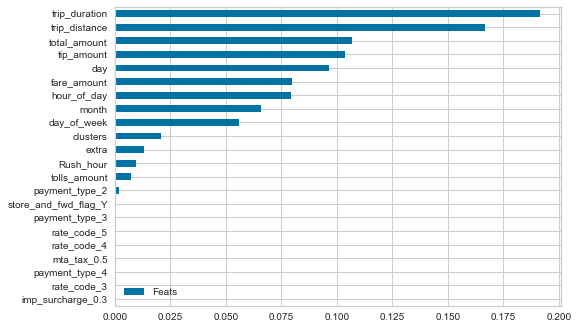

In [108]:
pd.DataFrame(rf.feature_importances_,
             index = dummytest.columns,
            columns = ['Feats']).sort_values(by = 'Feats').plot(kind='barh')